<a href="https://colab.research.google.com/github/SyedDanishAhmed84/email-spam-classifier/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [24]:
df=pd.read_csv('spam.csv',encoding='latin1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [25]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [26]:
df.shape

(5572, 5)

In [27]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [28]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [29]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [30]:
X=df['v2']
y=df['v1']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
vectorizer=TfidfVectorizer()
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [33]:
print(X_train.shape)

(4457,)


In [34]:
model=LogisticRegression()
model.fit(X_train_vec,y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(X_test_vec)

In [36]:
print(accuracy_score(y_test,y_pred))

0.967713004484305


In [37]:
print(confusion_matrix(y_test,y_pred))

[[964   1]
 [ 35 115]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [39]:
cm=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Actual')

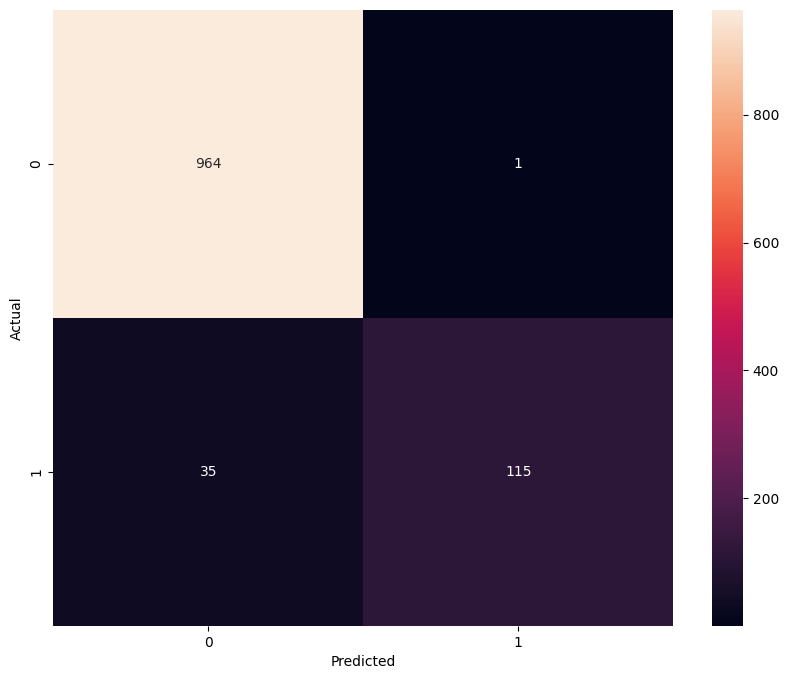

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
input_email=['Go until jurong point, crazy.. Available only ...	']
input_data_features=vectorizer.transform(input_email)
prediction=model.predict(input_data_features)
if prediction[0]=="spam":
  print("Spam")
else:
  print("Ham")

Ham
